In [1]:
import os
import numpy as np

In [2]:
# -- plotting --
import corner as dfm
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [3]:
# read GSWLC data: https://salims.pages.iu.edu/gswlc/#catalog-download
# data column details: https://salims.pages.iu.edu/gswlc/table2.pdf
fgswlc = os.path.join(os.environ['GALPOPFM_DIR'], 'obs', 'GSWLC-M2.dat')
gswlc = np.loadtxt(fgswlc, unpack=True)
#gswlc = np.loadtxt('/Users/tjitske/Downloads/GSWLC-M2.dat', unpack = True)

In [4]:
logm = gswlc[9]
logsfr = gswlc[11]
logssfr = logsfr-logm
A1500 = gswlc[13]
Av = gswlc[17]

In [5]:
has_Av = (Av != -99.) & (A1500 != -99.)
selection = (logssfr > -3 * (logm - 9.5) - 10.)

cuts = has_Av & selection

is_q = (logsfr < logm - 11.5)
is_sf = (logsfr > logm - 11.5)

(-13.5, -8.5)

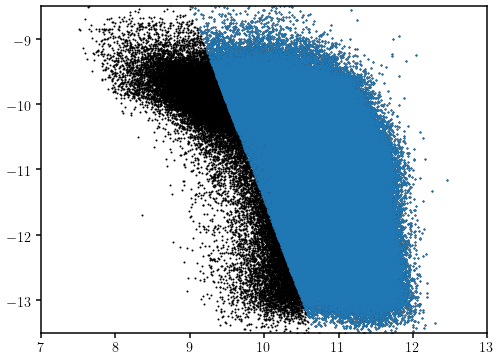

In [6]:
fig = plt.figure(figsize=(8,6))
sub = fig.add_subplot(111)
sub.scatter(logm, logssfr, s=1, c='k')
sub.scatter(logm[cuts], logssfr[cuts], s=1)
sub.set_xlim(7, 13)
sub.set_ylim(-13.5, -8.5)

/opt/anaconda3/envs/iq/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/envs/iq/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/envs/iq/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/opt/anaconda3/envs/iq/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


(0.0, 1.4)

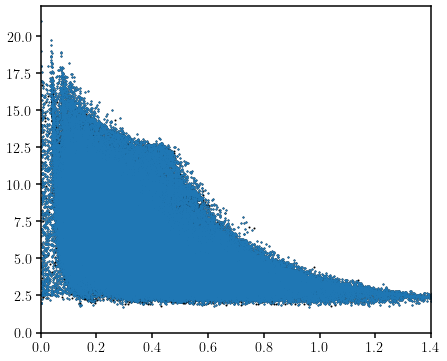

In [7]:
fig = plt.figure(figsize=(7,6))
sub = fig.add_subplot(111)
sub.scatter(Av, (A1500/Av), s=1, c='k')
sub.scatter(Av[cuts], (A1500/Av)[cuts], s=1)
sub.set_xlim(0., 1.4)

/opt/anaconda3/envs/iq/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/opt/anaconda3/envs/iq/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


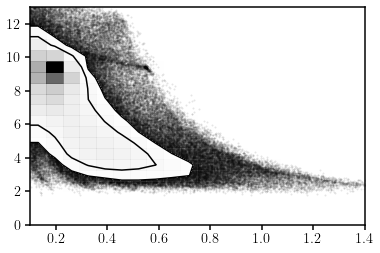

In [8]:
dfm.hist2d(Av[cuts], (A1500/Av)[cuts], levels=[0.68, 0.84], range=[[0.1, 1.4], [0., 13]])

(-13.5, -8.5)

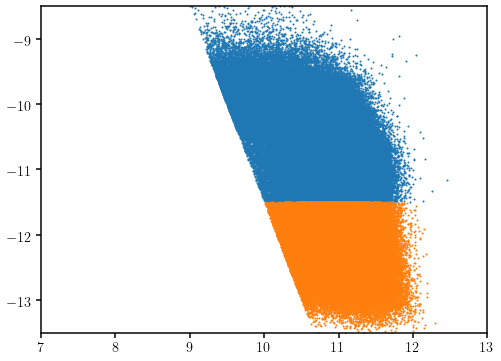

In [9]:
fig = plt.figure(figsize=(8,6))
sub = fig.add_subplot(111)
sub.scatter(logm[cuts & is_sf], logssfr[cuts & is_sf], s=1)
sub.scatter(logm[cuts & is_q], logssfr[cuts & is_q], s=1)
sub.set_xlim(7, 13)
sub.set_ylim(-13.5, -8.5)

/opt/anaconda3/envs/iq/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/envs/iq/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/envs/iq/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/opt/anaconda3/envs/iq/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


Text(0.95, 0.95, 'quiescent')

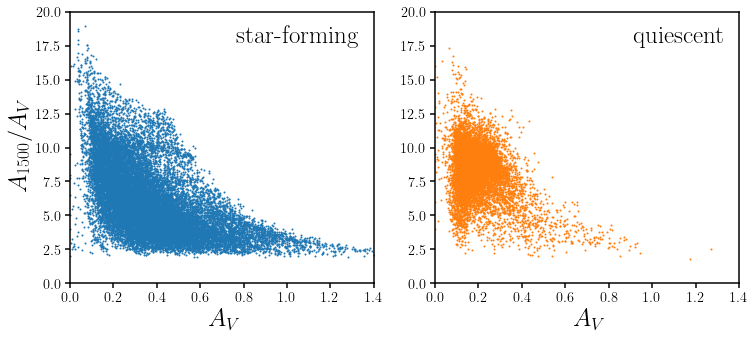

In [10]:
fig = plt.figure(figsize=(12,5))
sub = fig.add_subplot(121)
sub.scatter(Av[cuts & is_sf][::10], (A1500/Av)[cuts & is_sf][::10], s=1, c='C0')
sub.set_xlabel("$A_V$", fontsize=25)
sub.set_xlim(0., 1.4)
sub.set_ylabel('$A_{1500} / A_V$', fontsize=25)
sub.set_ylim(0., 20.)
sub.text(0.95, 0.95, 'star-forming', ha='right', va='top', transform=sub.transAxes, fontsize=25)

sub = fig.add_subplot(122)
sub.scatter(Av[cuts & is_q][::10], (A1500/Av)[cuts & is_q][::10], s=1, c='C1')
sub.set_xlabel("$A_V$", fontsize=25)
sub.set_xlim(0., 1.4)
sub.set_ylim(0., 20.)
sub.text(0.95, 0.95, 'quiescent', ha='right', va='top', transform=sub.transAxes, fontsize=25)


/opt/anaconda3/envs/iq/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/opt/anaconda3/envs/iq/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


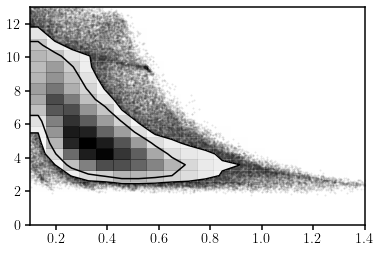

In [11]:
dfm.hist2d(Av[cuts & is_sf], (A1500/Av)[cuts & is_sf], levels=[0.68, 0.84], range=[[0.1, 1.4], [0., 13]])

/opt/anaconda3/envs/iq/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/opt/anaconda3/envs/iq/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


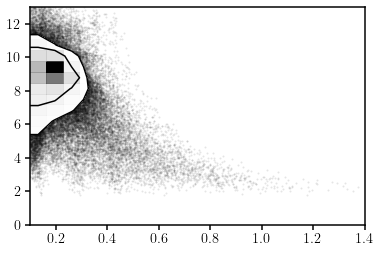

In [12]:
dfm.hist2d(Av[cuts & is_q], (A1500/Av)[cuts & is_q], levels=[0.68, 0.84], range=[[0.1, 1.4], [0., 13]])

(array([3.50000e+01, 5.25000e+02, 2.62300e+03, 9.36300e+03, 2.19070e+04,
        5.44640e+04, 1.14940e+05, 1.24505e+05, 2.75740e+04, 2.04000e+02]),
 array([ 7.254,  7.775,  8.296,  8.817,  9.338,  9.859, 10.38 , 10.901,
        11.422, 11.943, 12.464]),
 <a list of 10 Patch objects>)

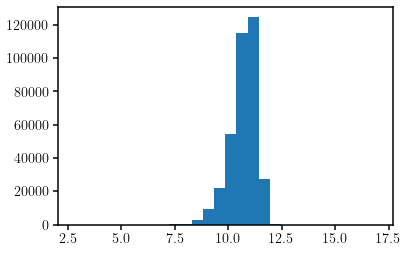

In [21]:
plt.hist(logm[logm > 0])

(-13.2, -9.0)

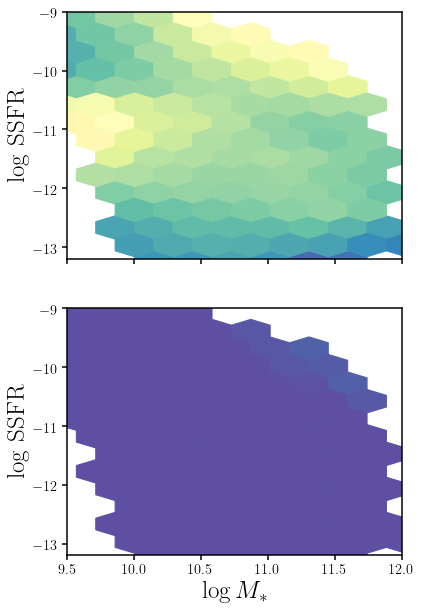

In [40]:
fig = plt.figure(figsize=(6,10))
sub = fig.add_subplot(211)
sub.hexbin(logm[has_Av], logssfr[has_Av], C=A1500[has_Av], reduce_C_function=np.median, gridsize=18, 
           vmin=0.5, vmax=5., mincnt=100, cmap='Spectral_r')
sub.set_xlim([9.5, 12.]) 
sub.set_xticklabels([])
sub.set_ylabel(r'$\log$ SSFR', fontsize=25)
sub.set_ylim([-13.2, -9.])

sub = fig.add_subplot(212)
sub.hexbin(logm[has_Av], logssfr[has_Av], C=Av[has_Av], reduce_C_function=np.median, gridsize=18, 
           vmin=0.5, vmax=5., mincnt=100, cmap='Spectral_r')
sub.set_xlabel(r'$\log M_*$', fontsize=25)
sub.set_xlim([9.5, 12.]) 
sub.set_ylabel(r'$\log$ SSFR', fontsize=25)
sub.set_ylim([-13.2, -9.])